In [49]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import pyplot
import csv
import os
import requests
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [50]:
def WriteListToCSV(csv_file,csv_columns,data_list):
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.writer(csvfile, dialect='excel', quoting=csv.QUOTE_NONNUMERIC)
            writer.writerow(csv_columns)
            for data in data_list:
                writer.writerow(data)
    except IOError:
            print("error")    
    return csv_file         

In [51]:
URL = "https://www.quandl.com/api/v3/datasets/EURONEXT/ALMIL.json?api_key=F9xUFfqyGZdfFeh9stsv"
myrequest = requests.get(url = URL)
#Extracting data to json format
quandlData = myrequest.json()

In [52]:
stockData = quandlData['dataset']['data']
stockPrice = []
for i in range(len(stockData)):
    stockPrice.append([stockData[i][0],stockData[i][3]])
stockPrice.reverse()

In [53]:
csv_columns = ['Date','Last Price']
csv_data_list = stockPrice
currentPath = os.getcwd()
csv_file = currentPath + "/Names.csv"
WriteListToCSV(csv_file,csv_columns,csv_data_list)

'C:\\Users\\hp\\Downloads\\WPy64-3720\\notebooks\\docs/Names.csv'

Text(0.5, 1.0, 'ALMIL stock price evolution')

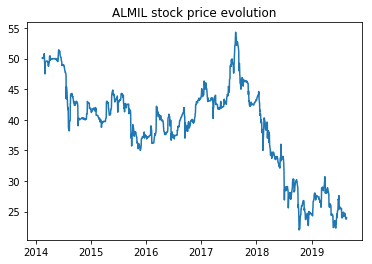

In [54]:
#We transpose our data into Time Series
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPrice_ts = pd.read_csv('Names.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
plt.plot(stockPrice_ts)
plt.title('ALMIL stock price evolution')

- Looking at the evolution of the stock price, we can observe a particular trend (decreasing move), so there is no stationnarity
- Now let's have a look at the autocorrelation of the stock price evolution

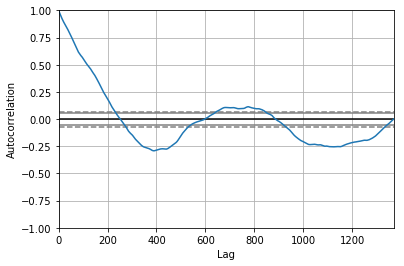

In [55]:
autocorrelation_plot(stockPrice_ts)
pyplot.show()

- We can see that autocorellation is positive for lags until approximately 200, but the autocorrelation is more significant for a number of lags around 10.

- I use Rolling Method to estimate historical volatility
- One trading month is 21 days

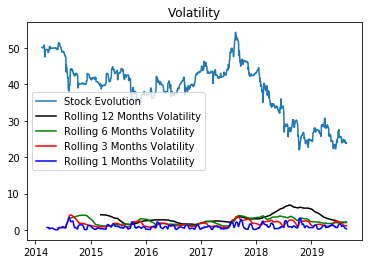

In [56]:
ts = stockPrice_ts['Last Price'] #We consider the closed price of the stock for each day
rolstd_12 = ts.rolling(252).std()
rolstd_6 = ts.rolling(126).std()
rolstd_3 = ts.rolling(63).std()
rolstd_1 = ts.rolling(21).std()
stock = plt.plot(ts, label = 'Stock Evolution')
std12 = plt.plot(rolstd_12, color='black', label = 'Rolling 12 Months Volatility')
std6 = plt.plot(rolstd_6, color='green', label = 'Rolling 6 Months Volatility')
std3 = plt.plot(rolstd_3, color='red', label = 'Rolling 3 Months Volatility')
std1 = plt.plot(rolstd_1, color='blue', label = 'Rolling 1 Months Volatility')
plt.legend(loc='best')
plt.title('Volatility')
plt.show(block=False)

ARIMA with Python

- So let's take 6 as the number of lags
- We choose a difference order of 2 to make the seres stationnary

C:\Users\hp\Downloads\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hp\Downloads\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D2.Last Price   No. Observations:                 1367
Model:                 ARIMA(6, 2, 0)   Log Likelihood               -1196.481
Method:                       css-mle   S.D. of innovations              0.580
Date:                Wed, 21 Aug 2019   AIC                           2408.962
Time:                        21:57:21   BIC                           2450.725
Sample:                             2   HQIC                          2424.593
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.568e-05      0.004     -0.014      0.989      -0.008       0.008
ar.L1.D2.Last Price    -0.8651      0.027    -32.347      0.000      -0.918      -0.813
ar.L2.D2.Last Pr

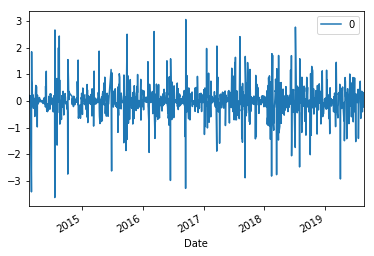

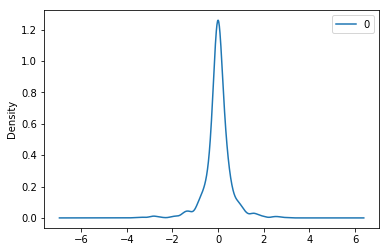

                 0
count  1367.000000
mean      0.000216
std       0.580598
min      -3.615087
25%      -0.188148
50%       0.006081
75%       0.210436
max       3.048800


In [57]:
# We first fit our model

myModel = ARIMA(ts, order=(6,2,0))
myModelFit = myModel.fit(disp=0)
print(myModelFit.summary())

# We plot the residual errors

residualErrors = DataFrame(myModelFit.resid)
residualErrors.plot()
pyplot.show()
residualErrors.plot(kind='kde')
pyplot.show()
print(residualErrors.describe())

- Let's make a rolling forecast with ARIMA
- We use the previous observation to predict the next one

predicted=46.359855, expected=46.570000
predicted=46.497963, expected=46.500000
predicted=46.571533, expected=46.200000
predicted=46.150841, expected=46.260000
predicted=46.214723, expected=46.260000
predicted=46.194594, expected=46.300000
predicted=46.434200, expected=46.360000
predicted=46.351201, expected=46.310000
predicted=46.282903, expected=46.400000
predicted=46.378382, expected=46.380000
predicted=46.404477, expected=46.380000
predicted=46.403036, expected=46.350000
predicted=46.361669, expected=46.250000
predicted=46.245951, expected=46.120000
predicted=46.086005, expected=46.150000
predicted=46.109948, expected=46.300000
predicted=46.269394, expected=46.150000
predicted=46.147253, expected=46.150000
predicted=46.126379, expected=46.020000
predicted=45.962660, expected=45.990000
predicted=45.945685, expected=45.970000
predicted=45.941074, expected=44.520000
predicted=44.391524, expected=44.100000
predicted=43.734242, expected=44.710000
predicted=44.309438, expected=43.030000


predicted=26.225789, expected=27.200000
predicted=26.759418, expected=27.600000
predicted=27.665282, expected=27.600000
predicted=27.483882, expected=27.600000
predicted=27.394092, expected=27.500000
predicted=27.332568, expected=27.400000
predicted=27.659236, expected=28.100000
predicted=28.261843, expected=27.100000
predicted=27.167524, expected=28.000000
predicted=28.036708, expected=27.900000
predicted=27.860163, expected=27.000000
predicted=27.077682, expected=27.400000
predicted=27.289268, expected=27.700000
predicted=27.646031, expected=28.000000
predicted=28.068260, expected=28.200000
predicted=28.401397, expected=28.200000
predicted=28.228481, expected=28.400000
predicted=28.439768, expected=29.000000
predicted=29.247478, expected=29.800000
predicted=30.144706, expected=30.000000
predicted=30.398029, expected=30.300000
predicted=30.651919, expected=29.900000
predicted=30.124978, expected=30.000000
predicted=30.229738, expected=30.300000
predicted=30.510278, expected=30.000000


predicted=23.131893, expected=22.400000
predicted=22.102973, expected=22.400000
predicted=21.986526, expected=23.000000
predicted=22.759584, expected=23.300000
predicted=23.219288, expected=23.300000
predicted=23.265102, expected=23.300000
predicted=23.172586, expected=23.500000
predicted=23.494083, expected=23.300000
predicted=23.420898, expected=23.400000
predicted=23.547524, expected=23.100000
predicted=23.092013, expected=22.500000
predicted=22.399182, expected=22.300000
predicted=22.110871, expected=22.800000
predicted=22.684546, expected=23.000000
predicted=22.966845, expected=23.600000
predicted=23.715188, expected=24.600000
predicted=24.781024, expected=24.000000
predicted=24.194344, expected=24.100000
predicted=24.343024, expected=24.600000
predicted=24.795125, expected=25.100000
predicted=25.450791, expected=25.200000
predicted=25.565423, expected=25.800000
predicted=26.127914, expected=27.000000
predicted=27.309464, expected=26.900000
predicted=27.375236, expected=27.000000


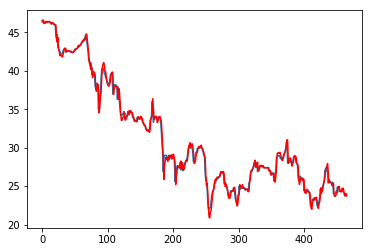

In [58]:
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
tracked_features = [x for x in train]
predictions = list()
for t in range(len(test)):
    myModel = ARIMA(tracked_features, order=(6,2,0))
    myModelFit = myModel.fit(disp=0)
    result = myModelFit.forecast()
    pred = result[0]
    predictions.append(pred)
    obs = test[t]
    tracked_features.append(obs)
    print('predicted=%f, expected=%f' % (pred, obs))
    
error = mean_squared_error(test, predictions)
print('Mean Square Error: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, 'red')
pyplot.show()